✅ Dataset Generated Successfully


,vehicle_count,traffic_density,avg_speed,signal_duration,lane_count,avg_waiting_time
0,377,0.20,67,55,2,35.09
1,164,0.23,26,106,1,55.71
2,352,0.48,21,31,2,30.42
3,169,0.55,21,91,2,61.34
4,416,0.68,54,73,2,44.47


,Model,MAE,RMSE,R2 Score
0,Linear Regression,4.008124,4.973114,0.894885
1,Ridge Regression,4.005366,4.968181,0.895094
2,Lasso Regression,4.205270,5.173074,0.886262
3,Decision Tree,6.146100,7.972645,0.729846
4,Random Forest,4.480817,5.606194,0.866419
5,Gradient Boosting,4.280809,5.363963,0.877714
6,XGBoost,4.833686,6.066434,0.843587


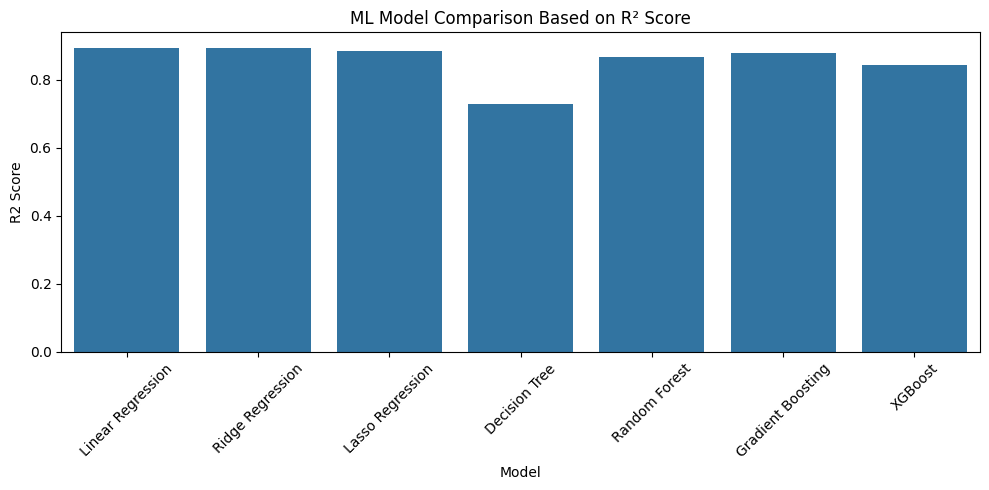


🏆 BEST PERFORMING MODEL
Model: Ridge Regression
R² Score: 0.895


In [3]:
# ===================== INSTALL =====================
!pip install numpy pandas scikit-learn matplotlib seaborn xgboost

# ===================== IMPORTS =====================
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

# ===================== RANDOM SEED (REPRODUCIBILITY) =====================
np.random.seed(42)
random.seed(42)

# ===================== PARAMETER GENERATION =====================
def generate_parameters():
    return {
        "vehicle_count": random.randint(50, 500),
        "traffic_density": round(random.uniform(0.1, 1.0), 2),
        "avg_speed": random.randint(20, 80),
        "signal_duration": random.randint(20, 120),
        "lane_count": random.randint(1, 4)
    }

# ===================== REALISTIC SIMULATION FUNCTION =====================
def run_simulation(params):
    base_wait = (
        (params["vehicle_count"] * params["traffic_density"]) /
        (params["avg_speed"] + 1)
    ) + (params["signal_duration"] * 0.5) + (params["lane_count"] * 2)

    noise = np.random.normal(loc=0, scale=5)  # real-world uncertainty
    return round(base_wait + noise, 2)

# ===================== DATA GENERATION (1000 SIMULATIONS) =====================
data = []

for _ in range(1000):
    params = generate_parameters()
    params["avg_waiting_time"] = run_simulation(params)
    data.append(params)

df = pd.DataFrame(data)
df.to_csv("traffic_simulation_dataset.csv", index=False)

print("✅ Dataset Generated Successfully")
display(df.head())

# ===================== TRAIN TEST SPLIT =====================
X = df.drop("avg_waiting_time", axis=1)
y = df["avg_waiting_time"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===================== ML MODELS =====================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", verbosity=0, random_state=42)
}

# ===================== TRAIN & EVALUATE =====================
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))

    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": rmse,
        "R2 Score": r2_score(y_test, preds)
    })

results_df = pd.DataFrame(results)
display(results_df)

# ===================== VISUALIZATION =====================
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R2 Score", data=results_df)
plt.xticks(rotation=45)
plt.title("ML Model Comparison Based on R² Score")
plt.tight_layout()
plt.show()

# ===================== BEST MODEL =====================
best = results_df.sort_values(by="R2 Score", ascending=False).iloc[0]

print("\n🏆 BEST PERFORMING MODEL")
print("Model:", best["Model"])
print("R² Score:", round(best["R2 Score"], 3))
